In [1]:
import json
import numpy as np
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt

from csc.mmp import *
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *

# Atom parameters
bmin = 0.005
bmax = 0.60
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.01
ymax = 0.034
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 1428 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_signals_{batchSize}.json'
path_to_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_omp_{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [3]:

metrics_at_step1 = workbench.sortByPositionErrorAtStep(path_to_omp_db, 1, ascending=False)
print(Counter([snr for snr in metrics_at_step1['snr']]))

Counter({15: 600, 10: 600, 0: 600, 5: 600, -5: 600})


In [4]:
metrics_at_step1 = metrics_at_step1.loc[metrics_at_step1['snr'] == 10]
print(metrics_at_step1.head(3))
ids = [id for id in metrics_at_step1.head(3)['id']]
#workbench.plotComparison(db_path=path_to_omp_db, ids=ids)

        id  snr  sparsity  pos_err  abs_pos_err  algo_step
8332  2133   10         4     -499          499          1
7428  1876   10         3     -403          403          1
9590  2398   10         5     -323          323          1


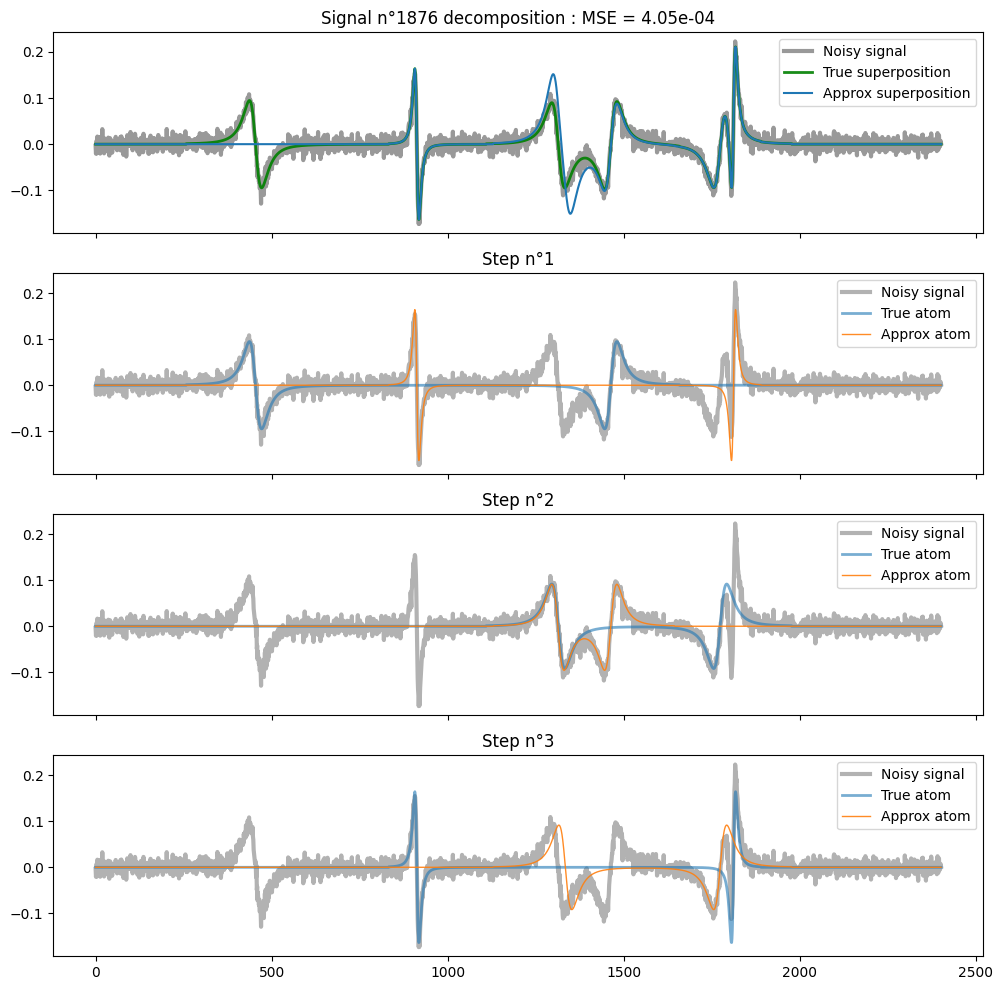

In [5]:
workbench.plotStepDecomposition(db_path=path_to_omp_db, id=ids[1])

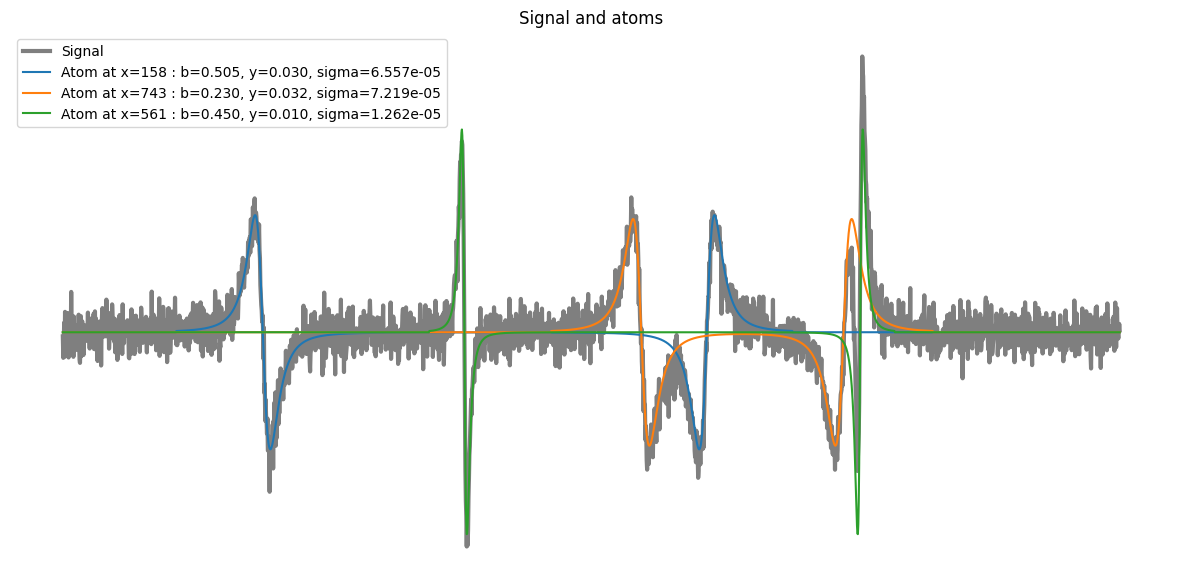

In [6]:
signal_dict = workbench.signalDictFromId(id=ids[1])
atoms = signal_dict['atoms']

fig, axs = plt.subplots(1, 1, figsize=(15, 7))
axs.plot(signal_dict['signal'], label='Signal', color='k', alpha=0.5, lw=3)

for atom in atoms :
    x, b, y, s = atom['x'], atom['b'], atom['y'], atom['s']
    atom = ZSAtom(b, y, s)
    atom.padBothSides(dictionary.getAtomsLength())
    atom_signal = atom.getAtomInSignal(len(signal_dict['signal']), x)
    axs.plot(atom_signal, label='Atom at x={} : {}'.format(x, str(atom)))
axs.legend()
axs.set_title('Signal and atoms')
axs.set_xticks([])
axs.set_yticks([])
plt.axis('off')
plt.show()

## Create a ``MMPTree`` for a given signal

In [7]:
signal = signal_dict['signal']
mmp_tree = MMPTree(dictionary, signal, sparsity=4, connections=2)

In [8]:
mmp_tree.runMMPDF(branches_number=5, verbose=True)
print(mmp_tree.leaves_paths)

Branch n°0 exploring path : (1, 1, 1, 1)
Added child node with activation index 838414
Added child node with activation index 802176
Added child node with activation index 1075811
Added child node with activation index 135285
Branch n°1 exploring path : (2, 1, 1, 1)
Added child node with activation index 773571
Added child node with activation index 802176
Added child node with activation index 262594
Branch n°2 exploring path : (1, 2, 1, 1)
Added child node with activation index 226835
Added child node with activation index 1061555
Added child node with activation index 802176
Added child node with activation index 981191
Branch n°3 exploring path : (2, 2, 1, 1)
Added child node with activation index 262594
Added child node with activation index 1082938
Branch n°4 exploring path : (1, 1, 2, 1)
Added child node with activation index 796467
Added child node with activation index 805032
[(1, 1, 1, 1), (2, 1, 1, 1), (1, 2, 1, 1), (2, 2, 1, 1), (1, 1, 2, 1), (2, 1, 2, 1)]
